In [1]:
#predict employee churn:
#churn means quit service or not

#importing basic libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
#To load dataset employee_data
df=pd.read_csv('employee_data.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0.0,sales,low
1,0.80,0.86,5,262,6,0,1,0.0,sales,medium
2,0.11,0.88,7,272,4,0,1,0.0,sales,medium
3,0.72,0.87,5,223,5,0,1,0.0,sales,low
4,0.37,0.52,2,159,3,0,1,0.0,sales,low


In [3]:
#to see null values 
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
quit                     0
promotion_last_5years    1
department               1
salary                   1
dtype: int64

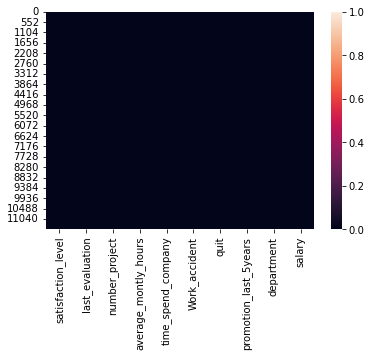

In [4]:
#to see visually
sb.heatmap(df.isnull())
plt.show()

In [5]:
#we can see there are null values in promotion_last_5years , department , salary
#so first lets handle the null values 

In [6]:
#to see unique and values of promotion_last_5years column
df['promotion_last_5years'].unique(),df['promotion_last_5years'].value_counts()

(array([ 0.,  1., nan]),
 0.0    11421
 1.0      160
 Name: promotion_last_5years, dtype: int64)

In [7]:
#we can see that frequency of 0.0 is more ,so lets fill the null(nan) with 0.0

In [8]:
#to replace null values with 0.0
df['promotion_last_5years'].fillna(0.00,inplace=True)

In [9]:
#to again see unique and values of promotion_last_5years column
df['promotion_last_5years'].value_counts(),df['promotion_last_5years'].unique()

(0.0    11422
 1.0      160
 Name: promotion_last_5years, dtype: int64,
 array([0., 1.]))

In [10]:
#the null value in promotion_last_5years column has be handled ,now lets move on to department

In [11]:
#to see unique and values of department column
df['department'].unique(),df['department'].value_counts()

(array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
        'IT', 'product_mng', 'marketing', 'RandD', nan], dtype=object),
 sales          3092
 technical      2227
 support        1790
 IT              935
 RandD           689
 product_mng     638
 marketing       633
 accounting      611
 hr              601
 management      365
 Name: department, dtype: int64)

In [12]:
#to replace null values with sales as we can see sales has the highest frequency
df['department'].fillna('sales',inplace=True)

In [13]:
#to again see unique and values of department column
df['department'].unique(),df['department'].value_counts()

(array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
        'IT', 'product_mng', 'marketing', 'RandD'], dtype=object),
 sales          3093
 technical      2227
 support        1790
 IT              935
 RandD           689
 product_mng     638
 marketing       633
 accounting      611
 hr              601
 management      365
 Name: department, dtype: int64)

In [14]:
#to see unique and values of salary column
df['salary'].unique(),df['salary'].value_counts()

(array(['low', 'medium', 'high', nan], dtype=object),
 low       5583
 medium    5097
 high       901
 Name: salary, dtype: int64)

In [15]:
#to replace null with low as we can see low has the highest frequency
df['salary'].fillna('low',inplace=True)

In [16]:
#to again see unique and values of salary column
df['salary'].unique(),df['salary'].value_counts()

(array(['low', 'medium', 'high'], dtype=object),
 low       5584
 medium    5097
 high       901
 Name: salary, dtype: int64)

In [17]:
#to see null values 
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
quit                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [18]:
#we have successfully handled the null values 

In [19]:
#to see duplicates
df.duplicated().sum()

9

In [20]:
#delete the duplicate value
df.drop_duplicates(inplace=True)

In [21]:
#to see duplicates
df.duplicated().sum()

0

In [22]:
#here we have dealt with the duplicate values also

In [23]:
#to see datatypes
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
quit                       int64
promotion_last_5years    float64
department                object
salary                    object
dtype: object

In [24]:
#we can see that we have object type data present , but the machine only accepts values in numeric type data
#so here we will now seperate object and numeric type data and store it in another dataframe
#we will then convert object type data in numeric type data by using LabelEncoder 
#then we will merge the seperated dataframes into a new single dataframe 

In [25]:
#to seperate df into df_cat and df_num
df_cat=df.select_dtypes('object')
df_num=df.select_dtypes(['float64','int64'])
print(df_cat.dtypes)
print(df_num.dtypes)

department    object
salary        object
dtype: object
satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
quit                       int64
promotion_last_5years    float64
dtype: object


In [26]:
#to apply LabelEncoder
from sklearn.preprocessing import LabelEncoder
#to create an object
le=LabelEncoder()
for col in df_cat:
    df_cat[col]=le.fit_transform(df_cat[col])

In [27]:
#to see that datatypes have changed or not 
df_cat.dtypes

department    int32
salary        int32
dtype: object

In [28]:
#to merge df_cat and df_num into df_new
df_new=pd.concat([df_num,df_cat],axis=1)
df_new.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0.0,7,1
1,0.80,0.86,5,262,6,0,1,0.0,7,2
2,0.11,0.88,7,272,4,0,1,0.0,7,2
3,0.72,0.87,5,223,5,0,1,0.0,7,1
4,0.37,0.52,2,159,3,0,1,0.0,7,1


In [29]:
#to see the datatypes now
df_new.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
quit                       int64
promotion_last_5years    float64
department                 int32
salary                     int32
dtype: object

In [30]:
#to see unique and its frequency in quit col
df_new['quit'].unique(),df_new['quit'].value_counts()

(array([1, 0], dtype=int64),
 0    9582
 1    1991
 Name: quit, dtype: int64)

In [31]:
#output column has categorical data so we will go for classification algorithms

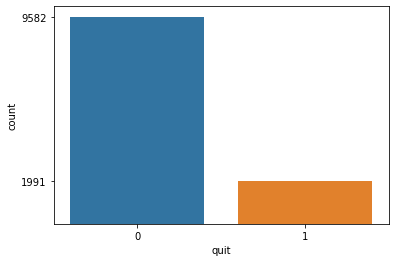

In [32]:
#to see visually
sb.countplot(data=df_new,x='quit')
f=df_new['quit'].value_counts()
plt.yticks(f)
plt.show()

In [33]:
#we can see that the data is highly imbalanced here

In [34]:
#to select input and output
X=df_new.drop('quit',axis=1)
Y=df_new['quit']

In [35]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [36]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((8101, 9), (3472, 9), (8101,), (3472,))

In [37]:
#to apply StandardScaler 
from sklearn.preprocessing import StandardScaler
#to create an object of StandardScaler
ss=StandardScaler()
#to apply 
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [38]:
X_train

array([[-2.18609134,  1.26212657,  1.90040627, ..., -0.12416681,
         0.72460002, -0.57863891],
       [-0.03122936, -0.8648485 , -0.68282398, ..., -0.12416681,
         0.38124574, -0.57863891],
       [-0.11410867, -1.8692534 , -0.68282398, ..., -0.12416681,
         1.06795429, -0.57863891],
       ...,
       [-2.22753099,  0.84854808,  1.90040627, ..., -0.12416681,
         0.03789146, -0.57863891],
       [-1.10866035,  0.08047375, -0.68282398, ..., -0.12416681,
         0.38124574,  1.02668774],
       [ 0.83900336,  0.78946544,  0.17825277, ..., -0.12416681,
        -0.6488171 , -0.57863891]])

In [39]:
#we need to balance it using RandomOverSampler 
#!pip install imblearn use this if requirement is not already satisfied

In [40]:
#to use Sampling Technique
#RandomOverSampler
from imblearn.over_sampling import RandomOverSampler
#create an object
ros=RandomOverSampler(random_state=1)
#apply oversampler on training data
X_train_ros,Y_train_ros=ros.fit_resample(X_train,Y_train)

In [41]:
#check oversampler has worked or not
Y_train_ros.value_counts()

1    6738
0    6738
Name: quit, dtype: int64

In [42]:
#similarly apply on testing data
#apply oversampler on testing data
X_test_ros,Y_test_ros=ros.fit_resample(X_test,Y_test)

In [43]:
#check oversampler has worked or not
Y_test_ros.value_counts()

0    2844
1    2844
Name: quit, dtype: int64

In [44]:
#data balancing done 

In [45]:
from sklearn.metrics import confusion_matrix,classification_report
#create a function 
def create_model(model): #model is user defined which holds the object of algo
    #train the model
    model.fit(X_train_ros,Y_train_ros)
    #test the data
    Y_pred=model.predict(X_test_ros)
    #Generate report
    print(confusion_matrix(Y_test_ros,Y_pred))
    print(classification_report(Y_test_ros,Y_pred))
    return model

# Logistic Regression

In [46]:
#to apply LogisticRegression 
from sklearn.linear_model import LogisticRegression
#create an object
lr=LogisticRegression()
#call function
lr=create_model(lr)

[[2213  631]
 [ 596 2248]]
              precision    recall  f1-score   support

           0       0.79      0.78      0.78      2844
           1       0.78      0.79      0.79      2844

    accuracy                           0.78      5688
   macro avg       0.78      0.78      0.78      5688
weighted avg       0.78      0.78      0.78      5688



# Decision Tree(Gini)

In [47]:
#perform DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
#to create an object
dt=DecisionTreeClassifier(random_state=1) #by default gini index method
#call function
dt=create_model(dt)

[[2784   60]
 [ 216 2628]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      2844
           1       0.98      0.92      0.95      2844

    accuracy                           0.95      5688
   macro avg       0.95      0.95      0.95      5688
weighted avg       0.95      0.95      0.95      5688



In [48]:
dict={'Input':X.columns,'IG':dt.feature_importances_}
df1=pd.DataFrame(dict)
df1.sort_values('IG',ascending=False,ignore_index=True)

,Input,IG
0,satisfaction_level,0.438207
1,time_spend_company,0.336042
2,last_evaluation,0.103950
3,average_montly_hours,0.067519
4,number_project,0.035886
5,department,0.015835
6,Work_accident,0.001586
7,salary,0.000974
8,promotion_last_5years,0.000000


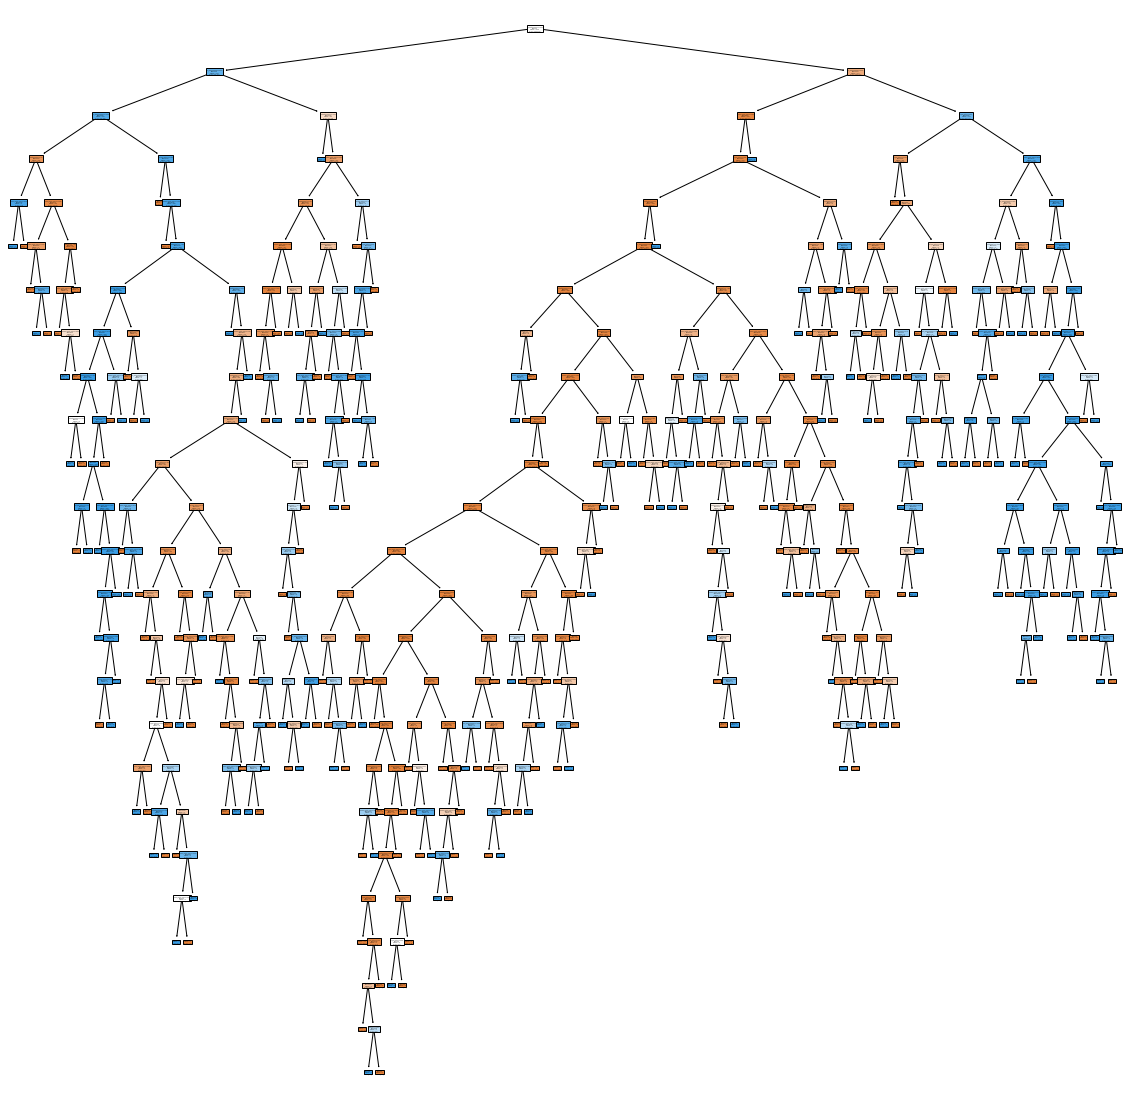

In [49]:
#create a tree
from sklearn import tree
features=X.columns
plt.figure(figsize=(20,20))
_=tree.plot_tree(dt,feature_names=features,filled=True)

# Decision Tree (max_depth,gini)

In [50]:
#to see with max_depth (pruning technique)
'''for i in range(1,9):
    dt1=DecisionTreeClassifier(random_state=1,max_depth=i)
    print('max_depth: ',i)
    #call function
    dt1=create_model(dt1)
'''
dt1=DecisionTreeClassifier(random_state=1,max_depth=5) #by default gini index method
#call function
dt1=create_model(dt1)

[[2643  201]
 [ 179 2665]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.93      2844
           1       0.93      0.94      0.93      2844

    accuracy                           0.93      5688
   macro avg       0.93      0.93      0.93      5688
weighted avg       0.93      0.93      0.93      5688



In [51]:
dict={'Input':X.columns,'IG':dt1.feature_importances_}
df2=pd.DataFrame(dict)
df2.sort_values('IG',ascending=False,ignore_index=True)

,Input,IG
0,satisfaction_level,0.446917
1,time_spend_company,0.411483
2,last_evaluation,0.078259
3,average_montly_hours,0.046862
4,number_project,0.014962
5,department,0.001517
6,Work_accident,0.000000
7,promotion_last_5years,0.000000
8,salary,0.000000


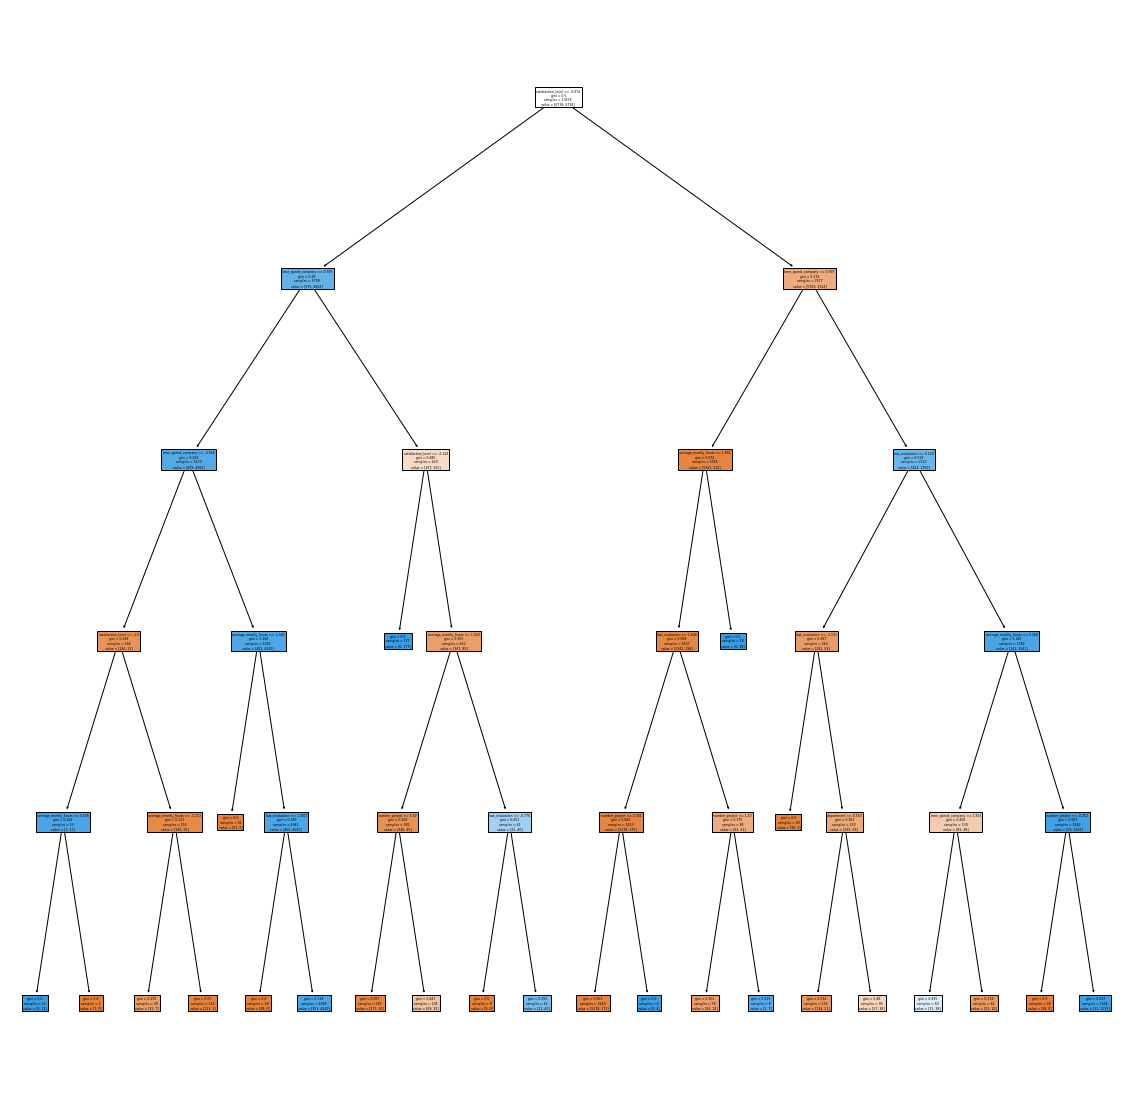

In [52]:
#create a tree
from sklearn import tree
features=X.columns
plt.figure(figsize=(20,20))
_=tree.plot_tree(dt1,feature_names=features,filled=True)

# Decision Tree (min_samples_leaf,gini)

In [53]:
#to see with min_samples_leaf
'''for i in range(45,101):
    dt2=DecisionTreeClassifier(random_state=1,min_samples_leaf=i)
    print("mi sample leaf: ",i)
    dt2=create_model(dt2)'''
dt2=DecisionTreeClassifier(random_state=1,min_samples_leaf=45) #by default gini index method
#call function
dt2=create_model(dt2)

[[2776   68]
 [ 205 2639]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      2844
           1       0.97      0.93      0.95      2844

    accuracy                           0.95      5688
   macro avg       0.95      0.95      0.95      5688
weighted avg       0.95      0.95      0.95      5688



In [54]:
dict={'Input':X.columns,'IG':dt2.feature_importances_}
df3=pd.DataFrame(dict)
df3.sort_values('IG',ascending=False,ignore_index=True)

,Input,IG
0,satisfaction_level,0.474099
1,time_spend_company,0.380008
2,last_evaluation,0.085459
3,average_montly_hours,0.046365
4,number_project,0.011835
5,department,0.001866
6,salary,0.000368
7,Work_accident,0.000000
8,promotion_last_5years,0.000000


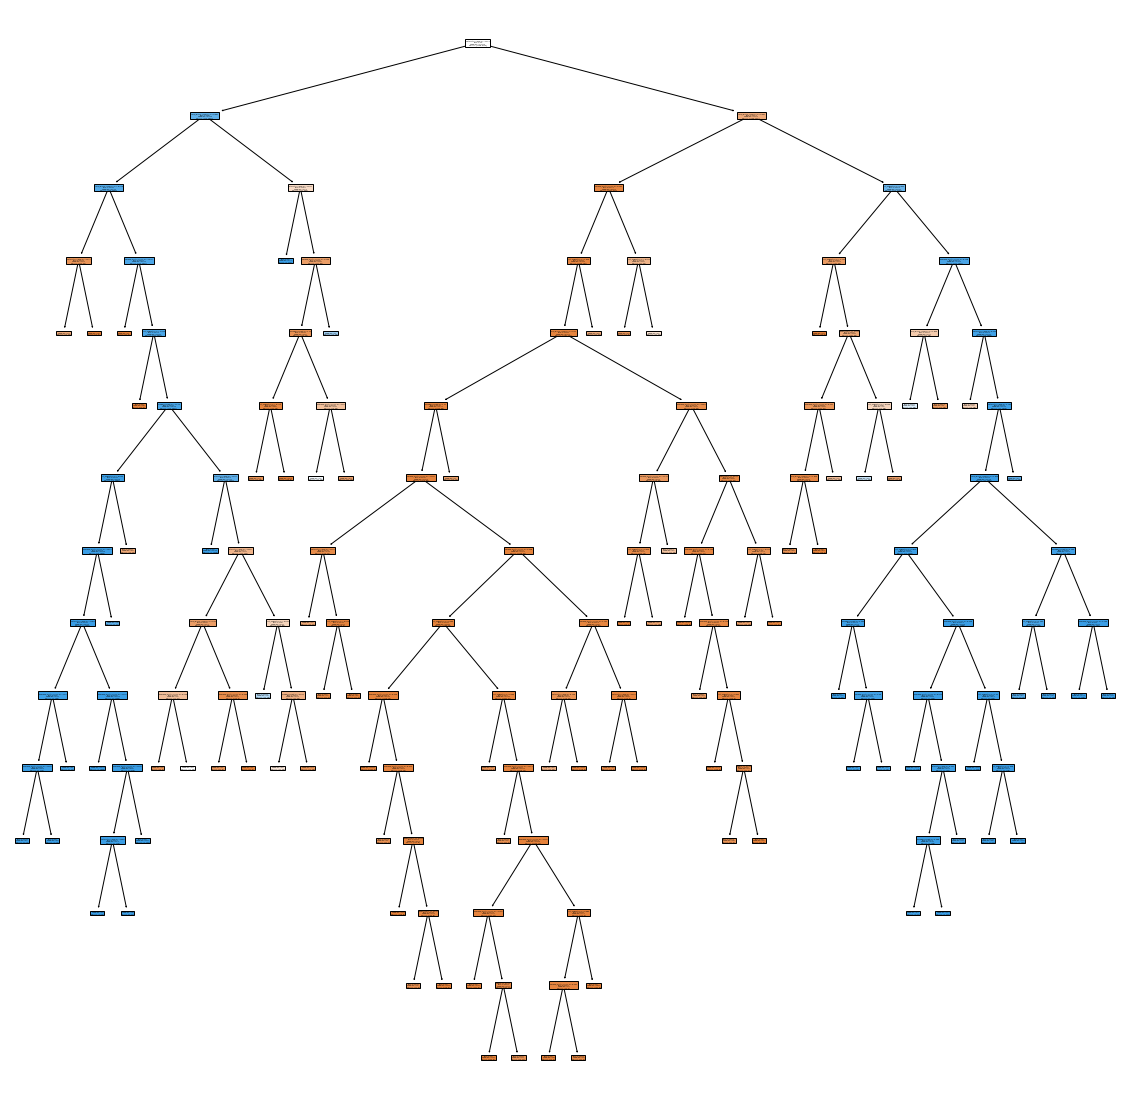

In [55]:
#create a tree
from sklearn import tree
features=X.columns
plt.figure(figsize=(20,20))
_=tree.plot_tree(dt2,feature_names=features,filled=True)

# Decision Tree(entropy)

In [56]:
#now to see with entropy method
dt=DecisionTreeClassifier(random_state=1,criterion='entropy')
#call function
dt=create_model(dt)

[[2796   48]
 [ 225 2619]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      2844
           1       0.98      0.92      0.95      2844

    accuracy                           0.95      5688
   macro avg       0.95      0.95      0.95      5688
weighted avg       0.95      0.95      0.95      5688



In [57]:
dict={'Input':X.columns,'IG':dt.feature_importances_}
df1=pd.DataFrame(dict)
df1.sort_values('IG',ascending=False,ignore_index=True)

,Input,IG
0,satisfaction_level,0.431967
1,time_spend_company,0.268961
2,last_evaluation,0.118530
3,average_montly_hours,0.085527
4,number_project,0.072752
5,department,0.014721
6,salary,0.006055
7,Work_accident,0.001487
8,promotion_last_5years,0.000000


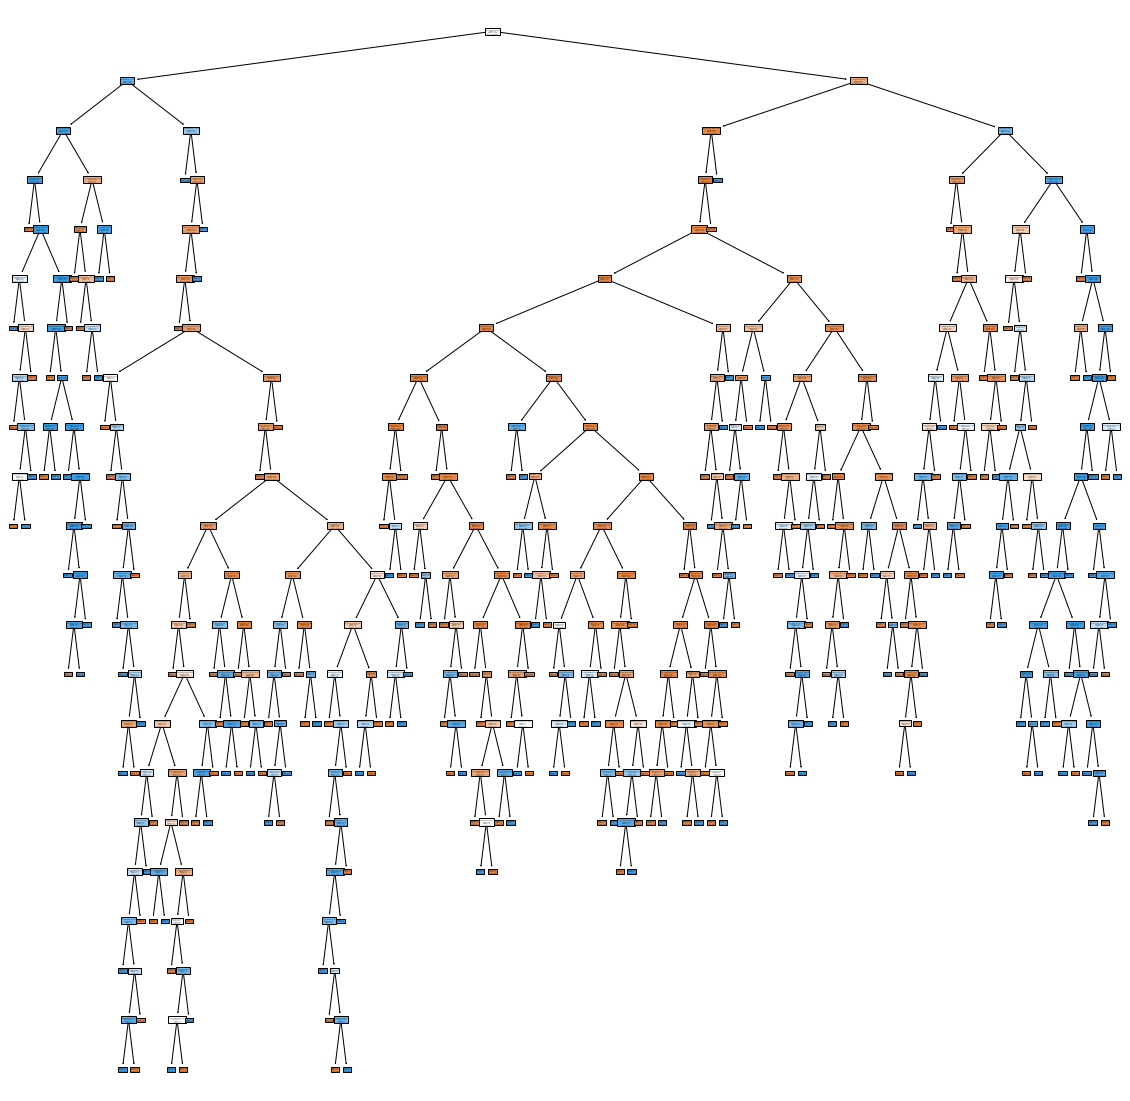

In [58]:
#create a tree
from sklearn import tree
features=X.columns
plt.figure(figsize=(20,20))
_=tree.plot_tree(dt,feature_names=features,filled=True)

# Decision Tree (max_depth,entropy)

In [59]:
#apply max_depth with entropy method
'''for i in range(1,9):
    dt1=DecisionTreeClassifier(random_state=1,criterion='entropy',max_depth=i)
    print('max depth: ',i)
    #call function
    dt1=create_model(dt1)'''
dt1=DecisionTreeClassifier(random_state=1,criterion='entropy',max_depth=2)
#call function
dt1=create_model(dt1)

[[2243  601]
 [ 119 2725]]
              precision    recall  f1-score   support

           0       0.95      0.79      0.86      2844
           1       0.82      0.96      0.88      2844

    accuracy                           0.87      5688
   macro avg       0.88      0.87      0.87      5688
weighted avg       0.88      0.87      0.87      5688



In [60]:
dict={'Input':X.columns,'IG':dt1.feature_importances_}
df2=pd.DataFrame(dict)
df2.sort_values('IG',ascending=False,ignore_index=True)

,Input,IG
0,satisfaction_level,0.467614
1,time_spend_company,0.456503
2,number_project,0.075883
3,last_evaluation,0.000000
4,average_montly_hours,0.000000
5,Work_accident,0.000000
6,promotion_last_5years,0.000000
7,department,0.000000
8,salary,0.000000


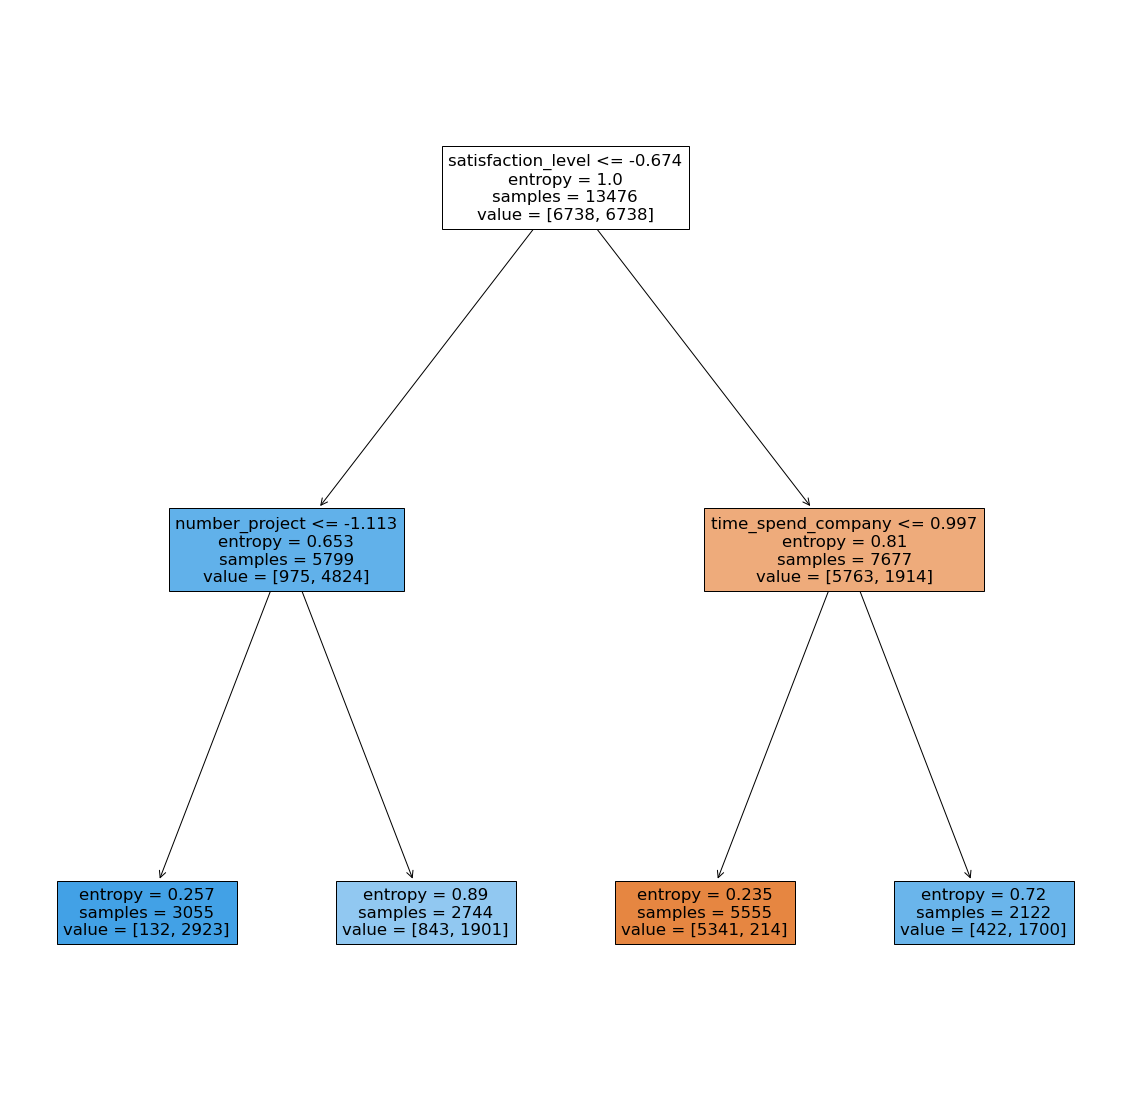

In [61]:
#create a tree
from sklearn import tree
features=X.columns
plt.figure(figsize=(20,20))
_=tree.plot_tree(dt1,feature_names=features,filled=True)

# Decision Tree (min_samples_leaf,entropy)

In [62]:
#now lets see with min_samples_leaf
#create object of DecisionTreeClassifier class 
'''for i in range(45,101):
    dt=DecisionTreeClassifier(random_state=1,min_samples_leaf=i,criterion='entropy') 
    print("mi sample leaf: ",i)
    #call function
    dt=create_model(dt)'''
dt2=DecisionTreeClassifier(random_state=1,min_samples_leaf=45,criterion='entropy') 
#call function
dt2=create_model(dt2)

[[2752   92]
 [ 184 2660]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      2844
           1       0.97      0.94      0.95      2844

    accuracy                           0.95      5688
   macro avg       0.95      0.95      0.95      5688
weighted avg       0.95      0.95      0.95      5688



In [63]:
dict={'Input':X.columns,'IG':dt2.feature_importances_}
df3=pd.DataFrame(dict)
df3.sort_values('IG',ascending=False,ignore_index=True)

,Input,IG
0,satisfaction_level,0.472170
1,time_spend_company,0.308520
2,last_evaluation,0.097231
3,average_montly_hours,0.059666
4,number_project,0.054897
5,department,0.003906
6,Work_accident,0.002145
7,salary,0.001465
8,promotion_last_5years,0.000000


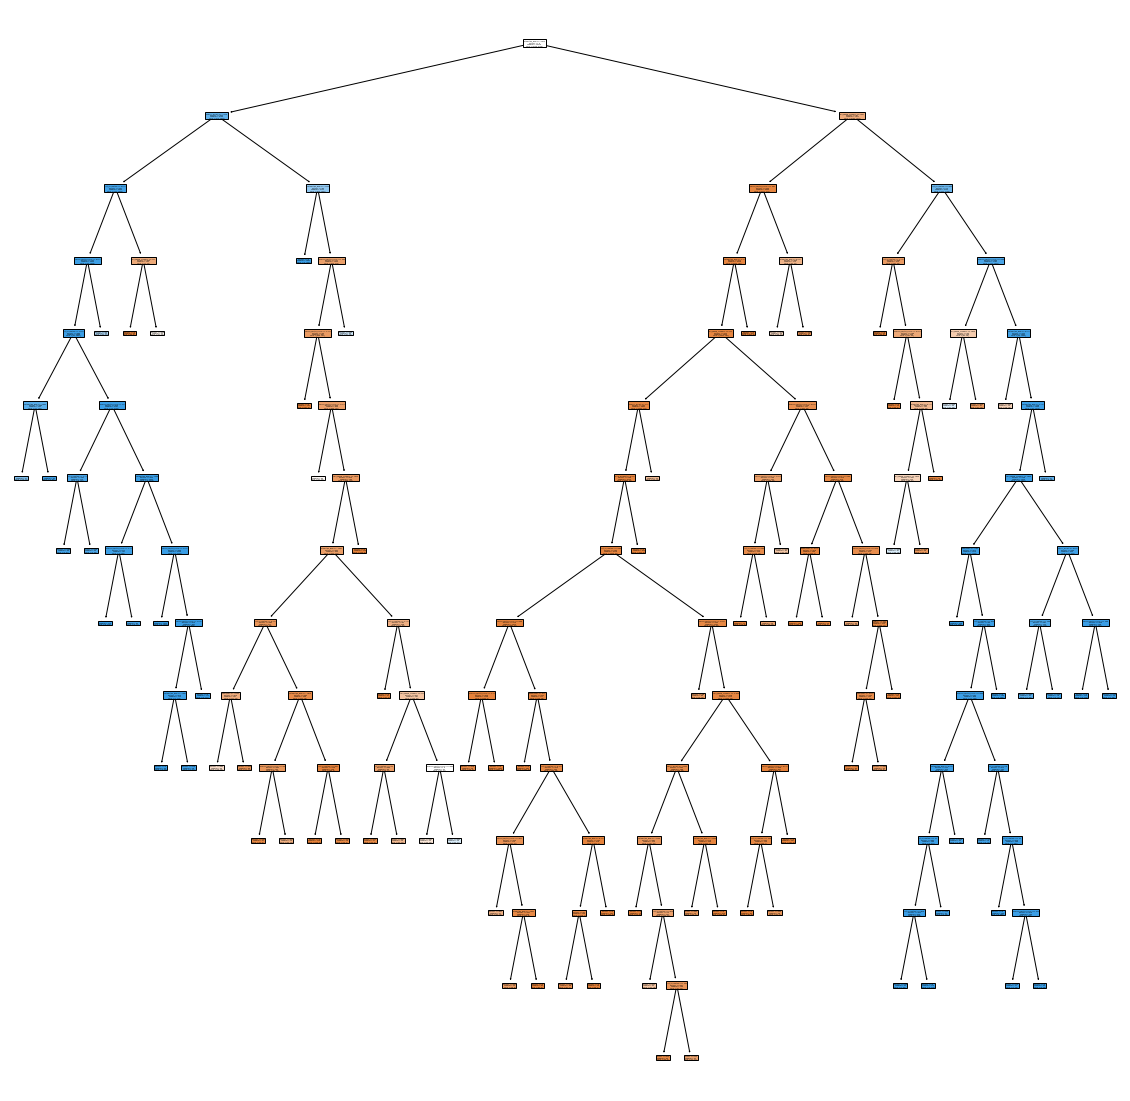

In [64]:
#create a tree
from sklearn import tree
features=X.columns
plt.figure(figsize=(20,20))
_=tree.plot_tree(dt2,feature_names=features,filled=True)

# Ensembling 

In [65]:
#apply Ensembling , randomforesttree

In [89]:
#to import randomforesttree
from sklearn.ensemble import RandomForestClassifier
#create object
#using for loop to find max_features=?

'''for i in range(9,0,-1):
    rfc=RandomForestClassifier(n_estimators=10,max_features=i,random_state=1)
    print('no of features: ',i)
    #call function
    rfc=create_model(rfc)'''
#using by default gini index method
rfc=RandomForestClassifier(n_estimators=10,max_features=2,random_state=1) 
#n_estimators means no of DTC(range 10-100)
#max_features means max no of features/inputs to choose within
#by default takes gini index
#call function
rfc=create_model(rfc)

[[2831   13]
 [ 229 2615]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      2844
           1       1.00      0.92      0.96      2844

    accuracy                           0.96      5688
   macro avg       0.96      0.96      0.96      5688
weighted avg       0.96      0.96      0.96      5688



In [90]:
# use entropy

'''for i in range(9,0,-1):
    #create object for RandomForestClassifier class
    rfc=RandomForestClassifier(n_estimators=10,max_features=i,random_state=1,criterion="entropy")
    print("no of features:",i)
    #call the function
    rfc=create_model(rfc)'''


rfc=RandomForestClassifier(n_estimators=10,max_features=2,random_state=1,criterion="entropy")
#call the function
rfc=create_model(rfc)

[[2834   10]
 [ 224 2620]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      2844
           1       1.00      0.92      0.96      2844

    accuracy                           0.96      5688
   macro avg       0.96      0.96      0.96      5688
weighted avg       0.96      0.96      0.96      5688



# ADA boosting - Adapter boosting

In [93]:
#apply AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
#using for loop

'''for i in range(1,10):
    ada=AdaBoostClassifier(n_estimators=i,random_state=1) #n_estimators means no of features
    print('no of decision stump: ',i)
    #call function
    ada=create_model(ada)'''

#create object
ada=AdaBoostClassifier(n_estimators=6,random_state=1)
#call function
ada=create_model(ada)

[[2606  238]
 [ 181 2663]]
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      2844
           1       0.92      0.94      0.93      2844

    accuracy                           0.93      5688
   macro avg       0.93      0.93      0.93      5688
weighted avg       0.93      0.93      0.93      5688



# Gradient Boosting

In [94]:
#to apply GradientBoostingClassifier on this dataset 
from sklearn.ensemble import GradientBoostingClassifier
'''#using for loop 
for i in range(10,101):
    gbc=GradientBoostingClassifier(random_state=1,n_estimators=i) #n_estimators means no of iterations
    print('no of iterations: ',i)
    #call function
    gbc=create_model(gbc)'''
    
#create an object
gbc=GradientBoostingClassifier(random_state=1,n_estimators=10) #n_estimators means no of iterations
#call function
gbc=create_model(gbc)

[[2611  233]
 [ 182 2662]]
              precision    recall  f1-score   support

           0       0.93      0.92      0.93      2844
           1       0.92      0.94      0.93      2844

    accuracy                           0.93      5688
   macro avg       0.93      0.93      0.93      5688
weighted avg       0.93      0.93      0.93      5688



# Extreme Gradient Boosting (XGB)

In [70]:
#to use XGB we need to install xgboost package
!pip install xgboost

In [71]:
#to apply XGBClassifier 
from xgboost import XGBClassifier
'''#using for loop
for i in range(10,101):
    xgc=XGBClassifier(n_estimators=i,reg_alpha=1,random_state=1)
    print('no of estimators: ',i)
    #call function
    xgc=create_model(xgc)'''
#create an object
xgc=XGBClassifier(n_estimators=10,reg_alpha=1,random_state=1)
#call function
xgc=create_model(xgc)

[[2824   20]
 [ 208 2636]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      2844
           1       0.99      0.93      0.96      2844

    accuracy                           0.96      5688
   macro avg       0.96      0.96      0.96      5688
weighted avg       0.96      0.96      0.96      5688



# Support Vector Machine (SVM)

In [72]:
#to try with LinearSVM 
from sklearn.svm import LinearSVC #LinearSVC means Linear support vector classifier
#create an object
svc=LinearSVC(random_state=1) #bydefault hard margin
#call function
svc=create_model(svc)

[[2193  651]
 [ 627 2217]]
              precision    recall  f1-score   support

           0       0.78      0.77      0.77      2844
           1       0.77      0.78      0.78      2844

    accuracy                           0.78      5688
   macro avg       0.78      0.78      0.78      5688
weighted avg       0.78      0.78      0.78      5688



In [73]:
#create object of LinearSVC and add some externl error during training time
svc1=LinearSVC(random_state=1,C=0.9) #here C is parameter which is used to add some error,range should be 0.001 to 0.9
#call function
svc1=create_model(svc)

[[2193  651]
 [ 627 2217]]
              precision    recall  f1-score   support

           0       0.78      0.77      0.77      2844
           1       0.77      0.78      0.78      2844

    accuracy                           0.78      5688
   macro avg       0.78      0.78      0.78      5688
weighted avg       0.78      0.78      0.78      5688



In [74]:
#data is not linear cause even after adding external errors we can see that there is no change in scores of recall 0 & 1

In [75]:
#use polynomial kernel function
from sklearn.svm import SVC
#create object ,pass poly in kernel parameter
svc2=SVC(random_state=1,kernel='poly')
#call function
svc2=create_model(svc2)

[[2714  130]
 [ 203 2641]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      2844
           1       0.95      0.93      0.94      2844

    accuracy                           0.94      5688
   macro avg       0.94      0.94      0.94      5688
weighted avg       0.94      0.94      0.94      5688



In [76]:
#lets check once with Radial basis
svc3=SVC(random_state=1,kernel='rbf')
#call function
svc3=create_model(svc3)

[[2732  112]
 [ 209 2635]]
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      2844
           1       0.96      0.93      0.94      2844

    accuracy                           0.94      5688
   macro avg       0.94      0.94      0.94      5688
weighted avg       0.94      0.94      0.94      5688



# KNN

In [77]:
#important features/inputs from the above we can see are 
#1)satisfaction_level	0.438207
#2)time_spend_company	0.336042
#3)last_evaluation	0.103950

#select input and output
X=df[['satisfaction_level','time_spend_company','last_evaluation']]
Y=df['quit']

In [78]:
X.head()

,satisfaction_level,time_spend_company,last_evaluation
0,0.38,3,0.53
1,0.80,6,0.86
2,0.11,4,0.88
3,0.72,5,0.87
4,0.37,3,0.52


In [79]:
#train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [80]:
#to apply StandardScaler
from sklearn.preprocessing import StandardScaler
#to create an object of StandardScaler
ss=StandardScaler()
#to apply 
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [81]:
#to apply KNN algo
from sklearn.neighbors import KNeighborsClassifier

#to create an object 
knc=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)

#p=2 means Euclidean distance means sqrt(x2-x1)*2+(y2-y1)*2
#n_neighbors means k means select minimum point (always odd)
#best value of k=5
#minkowski means Euclidean method specifier

#call function
knc=create_model(knc)

[[2649  195]
 [ 208 2636]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      2844
           1       0.93      0.93      0.93      2844

    accuracy                           0.93      5688
   macro avg       0.93      0.93      0.93      5688
weighted avg       0.93      0.93      0.93      5688



# Conclusion

In [97]:
#Scores using Logistic Regression for recall are 0->0.78 1->0.79
#Scores using Decision Tree(Gini Index Method) for recall are 0->0.98 1->0.92
#Scores using Decision Tree(Gini Index Method with max_depth hyperparameter) for recall are 0->0.93 1->0.94
#Scores using Decision Tree(Gini Index Method with min_samples_leaf hyperparameter) for recall are 0->0.98 1->0.93
#Scores using Decision Tree(Entropy Method) for recall are 0->0.98 1->0.92
#Scores using Decision Tree(Entropy Method with max_depth hyperparameter) for recall are 0->0.79 1->0.96
#Scores using Decision Tree(Entropy Method with min_samples_leaf hyperparameter) for recall are 0->0.97 1->0.94
#Scores using Ensembling(Random Forest Tree with Gini Index Method) for recall are 0->1.00 1->0.92
#Scores using Ensembling(Random Forest Tree with Entropy Method) for recall are 0->1.00 1->0.92
#Scores using ADA Boosting for recall are 0->0.92 1->0.94
#Scores using Gradient Boosting for recall are 0->0.92 1->0.94
#Scores using Extreme Gradient Boosting for recall are 0->0.99 1->0.93
#Scores using Support Vector Machine before adding any error for recall are 0->0.77 1->0.78
#Scores using Support Vector Machine after adding error for recall are 0->0.77 1->0.78
#Scores using Support Vector Machine using Polynomial Kernel Function for recall are 0->0.95 1->0.93
#Scores using Support Vector Machine using Radial Basis Kernel Function for recall are 0->0.96 1->0.93
#Scores using K-Nearest Neighbour for recall are 0->0.93 1->0.93

In [96]:
#After seeing all the scores of Various Algorithms ,we can now conclude that the best results and accuracy we will have on 
#Decision Tree(Entropy Method with max_depth hyperparameter) where the scores are as follows 0->0.79 1->0.96